(768, 8) (768, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 0s 11ms/step - loss: 0.6746 - val_loss: 0.6664
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6687 - val_loss: 0.6562
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6632 - val_loss: 0.6510
Epoch 4/300

Epoch 75/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5383 - val_loss: 0.5476
Epoch 76/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5373 - val_loss: 0.5467
Epoch 77/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5361 - val_loss: 0.5466
Epoch 78/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5352 - val_loss: 0.5461
Epoch 79/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5339 - val_loss: 0.5438
Epoch 80/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5336 - val_loss: 0.5422
Epoch 81/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5318 - val_loss: 0.5438
Epoch 82/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5305 - val_loss: 0.5438
Epoch 83/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5296 - val_loss: 0.5431
Epoch 84/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5288 - val_loss: 0.5414


13/13 [==============================] - 0s 2ms/step - loss: 0.4751 - val_loss: 0.5107
Epoch 157/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4746 - val_loss: 0.5101
Epoch 158/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4745 - val_loss: 0.5105
Epoch 159/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4738 - val_loss: 0.5089
Epoch 160/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4734 - val_loss: 0.5086
Epoch 161/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4729 - val_loss: 0.5093
Epoch 162/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4724 - val_loss: 0.5092
Epoch 163/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4719 - val_loss: 0.5085
Epoch 164/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4730 - val_loss: 0.5115
Epoch 165/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4715 - val_loss: 0.5078
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.4507 - val_loss: 0.4985
Epoch 238/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4503 - val_loss: 0.4984
Epoch 239/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4501 - val_loss: 0.4992
Epoch 240/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4503 - val_loss: 0.4993
Epoch 241/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4497 - val_loss: 0.4974
Epoch 242/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4502 - val_loss: 0.4971
Epoch 243/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4494 - val_loss: 0.4989
Epoch 244/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4496 - val_loss: 0.5002
Epoch 245/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4492 - val_loss: 0.4987
Epoch 246/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4499 - val_loss: 0.4968
Epoc

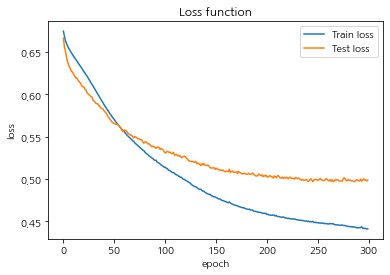

0.7597


In [2]:
import numpy as np
from tensorflow.keras.layers import Input, Dense    # Input(입력층), Dense(은닉, 출력층)
from tensorflow.keras.models import Model   # model 구성할 때
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\'
diabetes = pd.read_csv(DATA_PATH + 'diabetes.csv')

df = pd.read_csv(DATA_PATH + 'diabetes.csv')
df.head()

x_feat = df.iloc[:, :-1]
y_target = df['Outcome'].to_numpy().reshape(-1, 1)
print(x_feat.shape, y_target.shape)

# Standard, MinMax Scaler
# scaler = StandardScaler()
scaler = MinMaxScaler()

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(x_feat)
x_scaled = scaler.transform(x_feat)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_target, test_size=0.2)
x_train.shape, y_train.shape

xInput = Input(batch_shape = (None, x_train.shape[1]))
hidden = Dense(10, activation='relu')(xInput)
yOutput = Dense(y_train.shape[1], activation='sigmoid')(hidden)

model = Model(xInput, yOutput)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

hist = model.fit(x_train, y_train, batch_size = 50, epochs=300, 
                 validation_data=(x_test, y_test))

# error가 감소하는 모습을 관찰한다.
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.legend()
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

y_prob = model.predict(x_test)
y_pred = (y_prob > 0.5).astype('int8')

acc = (y_test == y_pred).mean()
print(round(acc, 4))
